In [1]:
!pip install pygame

In [7]:
import pygame
pygame.init()
print( pygame.display.list_modes())
screen = pygame.display.set_mode((800, 600))  # окно 800x600
pygame.display.set_caption("Моя игра")
running = True
while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
pygame.quit()

[(640, 480)]


KeyboardInterrupt: 

In [8]:
import cv2
from google.colab.patches import cv2_imshow
from google.colab import output
import time
import os, sys

In [9]:
# set SDL to use the dummy NULL video driver,
#   so it doesn't need a windowing system.
os.environ["SDL_VIDEODRIVER"] = "dummy"

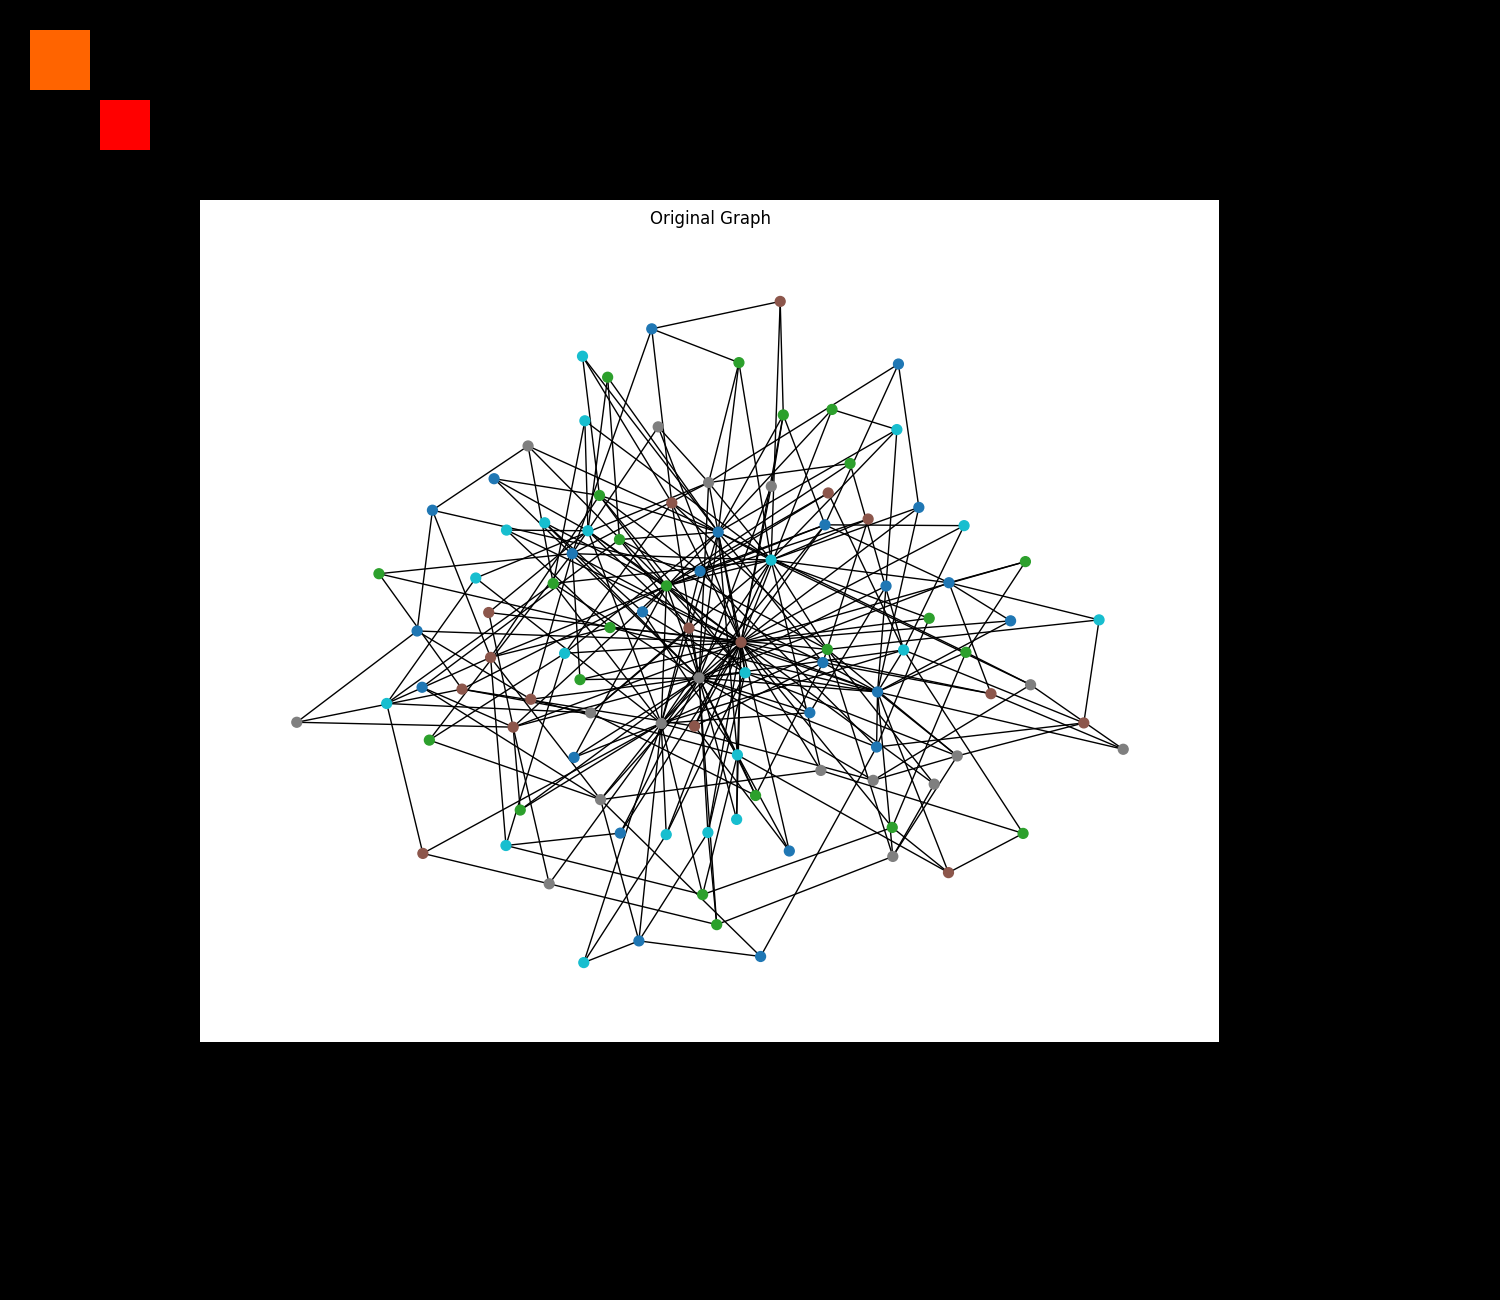

KeyboardInterrupt: 

In [17]:
import pygame

pygame.init()
screen = pygame.display.set_mode((1500, 1300))
done = False
is_blue = True
x = 30
y = 30
screen.fill((0, 0, 0))  # черный фон
pygame.draw.rect(screen, (255, 0, 0), (100, 100, 50, 50))  # красный квадрат
pygame.draw.circle(screen, (0, 255, 0), (400, 300), 30)  # зеленый круг
pygame.display.update()  # обновление экрана
player_img = pygame.image.load("/content/Без названия.png")  # PNG с прозрачностью
screen.blit(player_img, (200, 200))  # отрисовка

clock = pygame.time.Clock()  # для контроля FPS
while not done:
        clock.tick(60)

        for event in pygame.event.get():
                if event.type == pygame.QUIT:
                        done = True

        color = (255, 100, 0)
        pygame.draw.rect(screen, color, pygame.Rect(x, y, 60, 60))

        pygame.display.flip()

        #convert image so it can be displayed in OpenCV
        view = pygame.surfarray.array3d(screen)

        #  convert from (width, height, channel) to (height, width, channel)
        view = view.transpose([1, 0, 2])

        #  convert from rgb to bgr
        img_bgr = cv2.cvtColor(view, cv2.COLOR_RGB2BGR)

        #Display image, clear cell every 0.5 seconds
        cv2_imshow(img_bgr)
        time.sleep(0.5)
        output.clear()


In [16]:
player_img = pygame.image.load("/content/Без названия.png")  # PNG с прозрачностью
screen.blit(player_img, (200, 200))  # отрисовка

<rect(200, 200, 1019, 842)>

In [3]:
screen.fill((0, 0, 0))  # черный фон
pygame.draw.rect(screen, (255, 0, 0), (100, 100, 50, 50))  # красный квадрат
pygame.draw.circle(screen, (0, 255, 0), (400, 300), 30)  # зеленый круг
pygame.display.update()  # обновление экрана

In [ ]:
keys = pygame.key.get_pressed()
if keys[pygame.K_LEFT]:
    player_x -= 5                 # в colab не работает
if keys[pygame.K_RIGHT]:
    player_x += 5

In [ ]:

player_y_velocity = 0
gravity = 0.5

if keys[pygame.K_SPACE] and on_ground:
    player_y_velocity = -10  # прыжок
player_y_velocity += gravity
player_y += player_y_velocity

In [ ]:
tile_map = [
    [1, 1, 1, 1],
    [1, 0, 0, 1],
    [1, 0, 1, 1],
]
for y, row in enumerate(tile_map):
    for x, tile in enumerate(row):
        if tile == 1:
            pygame.draw.rect(screen, (120, 120, 120), (x*50, y*50, 50, 50))

In [ ]:
pygame.mixer.init()
jump_sound = pygame.mixer.Sound("jump.wav")
background_music = pygame.mixer.music.load("theme.mp3")
pygame.mixer.music.play(-1)  # зациклить

if jump_event:
    jump_sound.play()

In [ ]:
# Основные переменные
player_x, player_y = 100, 300
player_speed = 5
platforms = [pygame.Rect(0, 550, 800, 50), pygame.Rect(300, 400, 200, 20)]

while running:
    # Движение
    if keys[pygame.K_LEFT]: player_x -= player_speed
    if keys[pygame.K_RIGHT]: player_x += player_speed

    # Гравитация
    player_y += player_y_velocity
    player_y_velocity += 0.5

    # Проверка платформ
    player_rect = pygame.Rect(player_x, player_y, 40, 60)
    for platform in platforms:
        if player_rect.colliderect(platform) and player_y_velocity > 0:
            player_y = platform.y - 60
            player_y_velocity = 0